# **Bitcoin Price Prediction using Machine Learning**

# **Problem Statement:**
Machine learning enables automation in various fields, including trading, by predicting profitable trades. This project focuses on building a model using historical data to improve decision-making and reduce financial risks. We will use different libraries for data processing, visualization, and model training. 🚀

In [1]:
# Import necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns  # Seaborn for enhanced visualizations
import warnings  # Warnings module to handle unnecessary warning messages

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('bitcoin_data.csv')

# Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())  # Display the first 5 rows of the dataset

First 5 rows of the dataset:
         Date      Price       Open       High        Low     Vol. Change %
0  10-03-2025  79,812.10  80,702.20  83,902.80  79,264.30  105.70K   -1.09%
1  09-03-2025  80,691.60  86,221.50  86,498.60  80,048.90   69.90K   -6.41%
2  08-03-2025  86,221.90  86,783.80  86,886.80  85,264.60   41.90K   -0.36%
3  07-03-2025  86,531.20  89,879.50  91,059.80  84,864.30  138.11K   -3.78%
4  06-03-2025  89,930.90  90,611.70  92,802.00  87,849.60   89.27K   -0.75%


In [3]:
print("\nDataset Info:")
df.info()  # Display summary information about the dataset (column names, data types, non-null counts)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1529 non-null   object
 1   Price     1529 non-null   object
 2   Open      1522 non-null   object
 3   High      1529 non-null   object
 4   Low       1525 non-null   object
 5   Vol.      1529 non-null   object
 6   Change %  1529 non-null   object
dtypes: object(7)
memory usage: 83.7+ KB


In [4]:
print("\nDataset Shape:", df.shape)  # Print the number of rows and columns in the dataset



Dataset Shape: (1529, 7)


In [5]:
print("\nSummary Statistics:")
print(df.describe(include='all'))  # Display statistical summary, including non-numeric columns


Summary Statistics:
              Date      Price       Open       High        Low    Vol.  \
count         1529       1529       1522       1529       1525    1529   
unique        1529       1525       1517       1525       1524    1480   
top     01-01-2021  21,517.20  29,912.70  40,599.00  34,357.40  56.24K   
freq             1          2          2          2          2       3   

       Change %  
count      1529  
unique      820  
top      -0.03%  
freq          7  


In [6]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

# **Data Cleaning**

# Handling Missing Values

In [7]:
# Check for missing values
print("\nMissing values in each column:")  # Print a message for clarity
print(df.isnull().sum()/len(df)*100)  # Display the count of missing values for each column


Missing values in each column:
Date        0.000000
Price       0.000000
Open        0.457816
High        0.000000
Low         0.261609
Vol.        0.000000
Change %    0.000000
dtype: float64


In [8]:
# Handle missing values
df.dropna(inplace=True)  # Drop any rows that contain missing values

In [9]:
# Check again if any missing values remain after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())  # Display the count of missing values after handling



Missing values after cleaning:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [10]:
# Convert relevant columns to numeric type
# The dataset contains values with commas and percentage signs, so they need to be cleaned

# Convert 'Price' column from string to numeric, removing commas
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

In [11]:
# Convert 'Open' column from string to numeric, removing commas
df['Open'] = pd.to_numeric(df['Open'].str.replace(',', ''), errors='coerce')

In [12]:
# Convert 'High' column from string to numeric, removing commas
df['High'] = pd.to_numeric(df['High'].str.replace(',', ''), errors='coerce')

In [13]:
# Convert 'Low' column from string to numeric, removing commas
df['Low'] = pd.to_numeric(df['Low'].str.replace(',', ''), errors='coerce')

In [14]:
# Convert 'Vol.' column by replacing 'K' with 'e3' (thousands) and 'M' with 'e6' (millions)
df['Vol.'] = df['Vol.'].str.replace('K', 'e3').str.replace('M', 'e6')

In [15]:
# Convert 'Vol.' column from string to numeric (after conversion of K/M suffixes)
df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce')

In [16]:
# Convert 'Change %' column by removing '%' and converting it to decimal (e.g., -1.09% → -0.0109)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float) / 100

In [17]:
# Convert 'Date' column from string format to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

In [18]:
# Dataset after cleaning
df.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-03-10,79812.1,80702.2,83902.8,79264.3,105700.0,-0.0109
1,2025-03-09,80691.6,86221.5,86498.6,80048.9,69900.0,-0.0641
2,2025-03-08,86221.9,86783.8,86886.8,85264.6,41900.0,-0.0036
3,2025-03-07,86531.2,89879.5,91059.8,84864.3,138110.0,-0.0378
4,2025-03-06,89930.9,90611.7,92802.0,87849.6,89270.0,-0.0075
5,2025-03-05,90611.7,87269.5,90937.8,86429.4,95540.0,0.0383
6,2025-03-04,87266.3,86083.8,88887.8,81617.0,132500.0,0.0123
7,2025-03-03,86209.7,94266.1,94266.1,85140.8,143150.0,-0.0855
8,2025-03-02,94265.1,86065.7,94986.5,85069.3,126760.0,0.0952
9,2025-03-01,86071.6,84353.4,86546.3,83837.3,79510.0,0.0200


# Handling Outliers

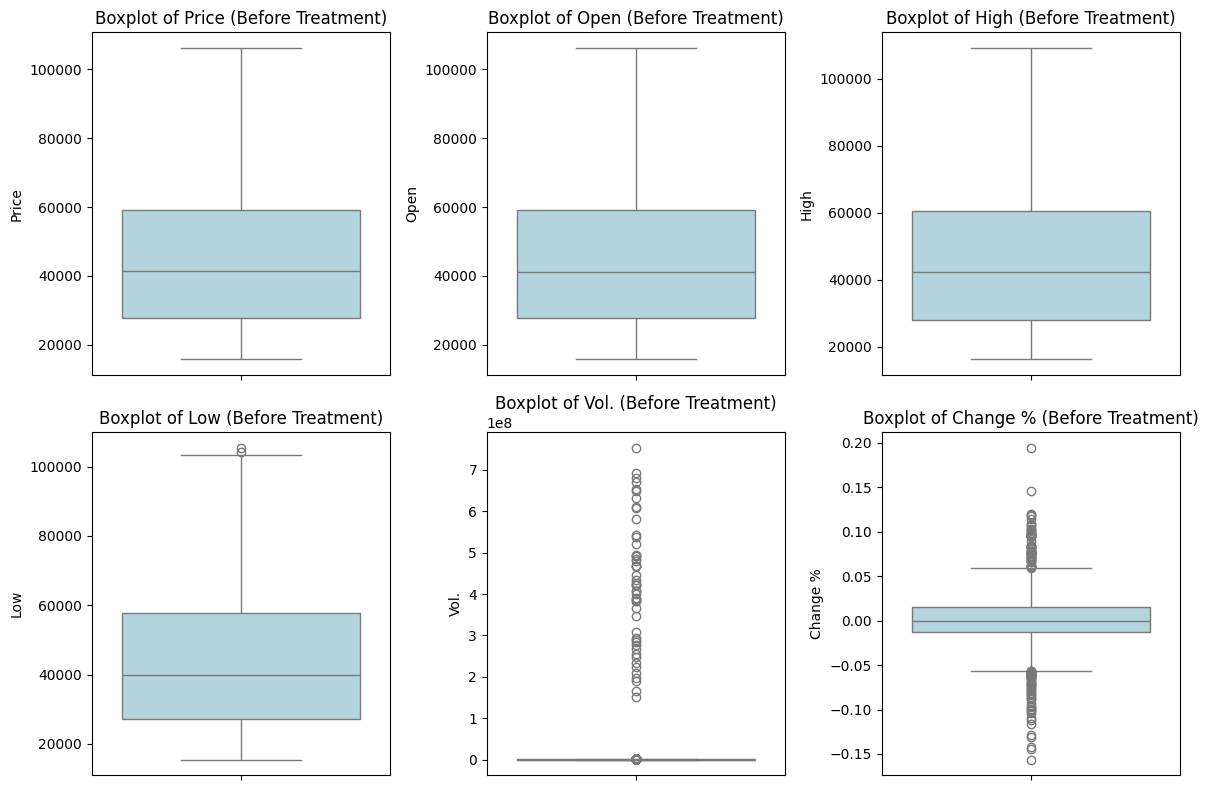

In [19]:
# Define numerical columns to check for outliers
num_cols = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

# Create boxplots to visualize outliers before treatment
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)  # Arrange subplots in a 2x3 layout
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col} (Before Treatment)')

plt.tight_layout()
plt.show()

In [20]:
# Function to calculate IQR and identify outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count number of outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers detected")

# Check outliers for each numerical column
for col in num_cols:
    identify_outliers(df, col)


Price: 0 outliers detected
Open: 0 outliers detected
High: 0 outliers detected
Low: 2 outliers detected
Vol.: 158 outliers detected
Change %: 121 outliers detected


In [21]:
# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values instead of removing them
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply capping to all numerical columns
for col in num_cols:
    cap_outliers(df, col)

# Check dataset shape after handling outliers
print("\nDataset shape after handling outliers:", df.shape)



Dataset shape after handling outliers: (1518, 7)


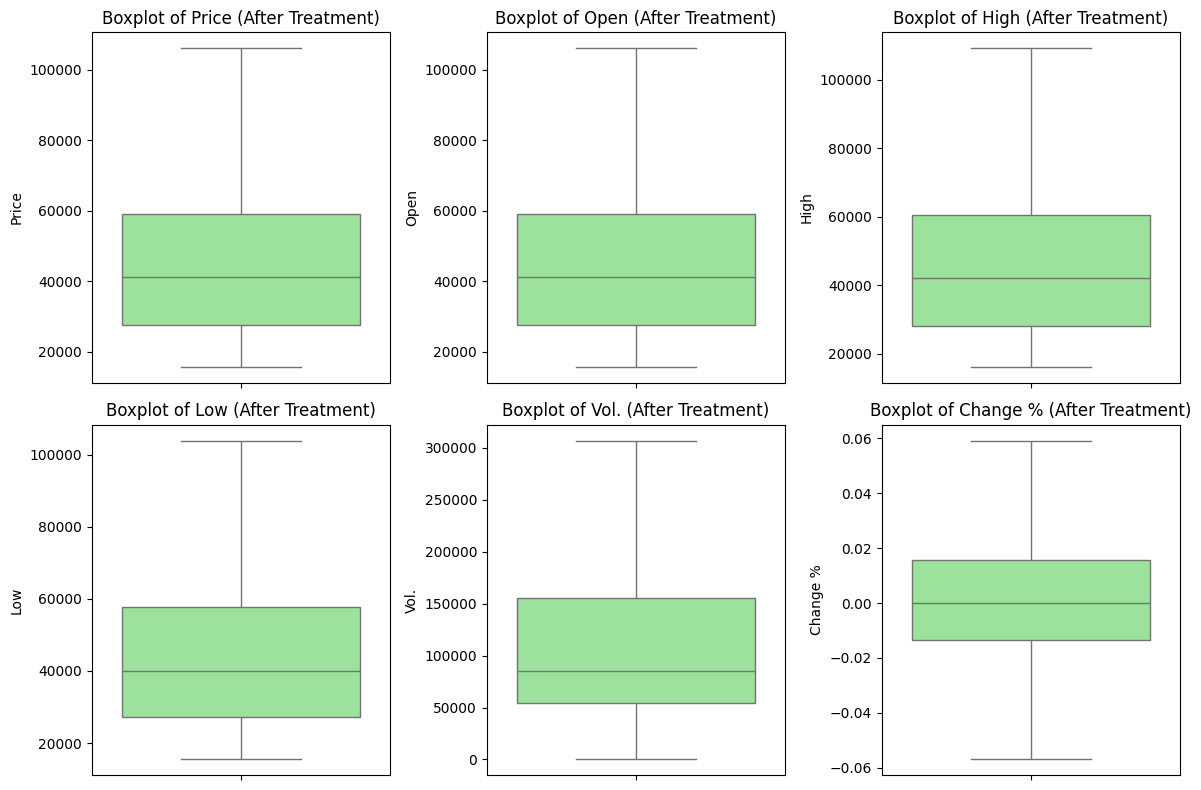

In [22]:
# Create boxplots to visualize outliers after treatment
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)  # Arrange subplots in a 2x3 layout
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col} (After Treatment)')

plt.tight_layout()
plt.show()


# Feature Engineering

In [23]:
# Extract date-based features from 'Date' column
df['Year'] = df['Date'].dt.year  # Extract year
df['Month'] = df['Date'].dt.month  # Extract month
df['Day'] = df['Date'].dt.day  # Extract day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Extract day of the week (0 = Monday, 6 = Sunday)
df['WeekOfYear'] = df['Date'].dt.isocalendar().week  # Extract week of the year

# Check new features
df.head()


,Date,Price,Open,High,Low,Vol.,Change %,Year,Month,Day,DayOfWeek,WeekOfYear
0,2025-03-10,79812.1,80702.2,83902.8,79264.3,105700.0,-0.0109,2025,3,10,0,11
1,2025-03-09,80691.6,86221.5,86498.6,80048.9,69900.0,-0.0569,2025,3,9,6,10
2,2025-03-08,86221.9,86783.8,86886.8,85264.6,41900.0,-0.0036,2025,3,8,5,10
3,2025-03-07,86531.2,89879.5,91059.8,84864.3,138110.0,-0.0378,2025,3,7,4,10
4,2025-03-06,89930.9,90611.7,92802.0,87849.6,89270.0,-0.0075,2025,3,6,3,10


In [24]:
# Create a new dataframe to store engineered features
df_cleaned = pd.DataFrame(df)

# Compute percentage change in price and volume
df_cleaned['Price_Change_Percent'] = df['Price'].pct_change() * 100
df_cleaned['Vol_Change_Percent'] = df['Vol.'].pct_change() * 100


In [25]:
# 📊 Compute 7-day and 21-day Exponential Moving Averages (EMAs)
# EMA gives more weight to recent prices, making it more responsive than a Simple Moving Average (SMA).
# Short-term EMAs (like 7-day) react faster to price changes, while long-term EMAs (like 21-day) show overall trends.

df_cleaned['Short_Term_EMA'] = df_cleaned['Price'].ewm(span=7, adjust=False).mean()  # 7-day EMA for short-term trend
df_cleaned['Long_Term_EMA'] = df_cleaned['Price'].ewm(span=21, adjust=False).mean()  # 21-day EMA for long-term trend

# Check dataset
df_cleaned.head(10)


,Date,Price,Open,High,Low,Vol.,Change %,Year,Month,Day,DayOfWeek,WeekOfYear,Price_Change_Percent,Vol_Change_Percent,Short_Term_EMA,Long_Term_EMA
0,2025-03-10,79812.1,80702.2,83902.8,79264.3,105700.0,-0.0109,2025,3,10,0,11,NaN,NaN,79812.100000,79812.100000
1,2025-03-09,80691.6,86221.5,86498.6,80048.9,69900.0,-0.0569,2025,3,9,6,10,1.101963,-33.869442,80031.975000,79892.054545
2,2025-03-08,86221.9,86783.8,86886.8,85264.6,41900.0,-0.0036,2025,3,8,5,10,6.853625,-40.057225,81579.456250,80467.495041
3,2025-03-07,86531.2,89879.5,91059.8,84864.3,138110.0,-0.0378,2025,3,7,4,10,0.358726,229.618138,82817.392188,81018.740947
4,2025-03-06,89930.9,90611.7,92802.0,87849.6,89270.0,-0.0075,2025,3,6,3,10,3.928872,-35.363116,84595.769141,81828.937224
5,2025-03-05,90611.7,87269.5,90937.8,86429.4,95540.0,0.0383,2025,3,5,2,10,0.757026,7.023636,86099.751855,82627.370204
6,2025-03-04,87266.3,86083.8,88887.8,81617.0,132500.0,0.0123,2025,3,4,1,10,-3.692018,38.685367,86391.388892,83049.091094
7,2025-03-03,86209.7,94266.1,94266.1,85140.8,143150.0,-0.0569,2025,3,3,0,10,-1.210777,8.037736,86345.966669,83336.419177
8,2025-03-02,94265.1,86065.7,94986.5,85069.3,126760.0,0.0591,2025,3,2,6,9,9.343960,-11.449528,88325.750002,84329.935615
9,2025-03-01,86071.6,84353.4,86546.3,83837.3,79510.0,0.0200,2025,3,1,5,9,-8.691976,-37.275166,87762.212501,84488.268741


# **✅ Feature Selection**

In [26]:
import numpy as np

# Create the binary target variable
# If today's price increased compared to yesterday, mark it as 1 (Price Up), else 0
df_cleaned['Price_Up'] = np.where(df_cleaned['Price_Change_Percent'] > 0, 1, 0)

# Select meaningful features based on domain knowledge and prediction relevance
# These features help model the price movement trend effectively

selected_features = [
    'Open',                 # Opening price of the day
    'High',                 # Highest price of the day
    'Low',                  # Lowest price of the day
    'Vol.',                 # Volume traded — often a volatility indicator
    'Change %',             # Previous day's % change in price
    'Price_Change_Percent', # Continuous version of the target (momentum)
    'Short_Term_EMA',       # 7-day exponential moving average (short-term trend)
    'Long_Term_EMA',        # 21-day exponential moving average (long-term trend)
    'DayOfWeek',            # Day of the week — might impact trading behavior
    'Month'                 # Month of the year — seasonal market effects
]

# Target variable for logistic regression
target_variable = 'Price_Up'

# Prepare a cleaned dataframe with only selected features + target
df_features = df_cleaned[selected_features + [target_variable]].dropna()

# Preview the resulting feature set
print("Selected Features:")
df_features.head()


Selected Features:


,Open,High,Low,Vol.,Change %,Price_Change_Percent,Short_Term_EMA,Long_Term_EMA,DayOfWeek,Month,Price_Up
1,86221.5,86498.6,80048.9,69900.0,-0.0569,1.101963,80031.975000,79892.054545,6,3,1
2,86783.8,86886.8,85264.6,41900.0,-0.0036,6.853625,81579.456250,80467.495041,5,3,1
3,89879.5,91059.8,84864.3,138110.0,-0.0378,0.358726,82817.392188,81018.740947,4,3,1
4,90611.7,92802.0,87849.6,89270.0,-0.0075,3.928872,84595.769141,81828.937224,3,3,1
5,87269.5,90937.8,86429.4,95540.0,0.0383,0.757026,86099.751855,82627.370204,2,3,1


# **✅ Data Visualization**

### 1️⃣ Price over Time – Long-term trend

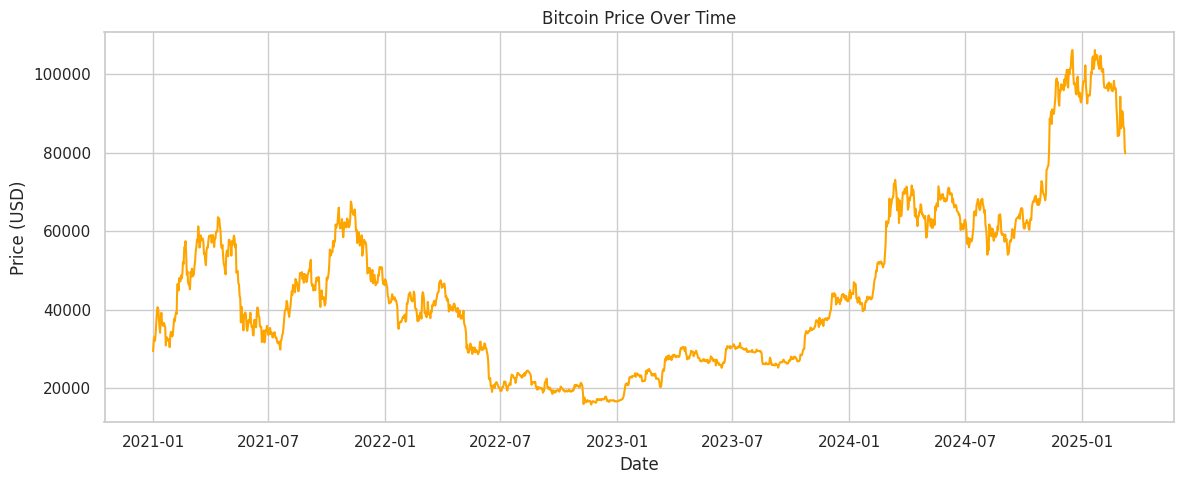

In [27]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))
plt.plot(df_cleaned['Date'], df_cleaned['Price'], color='orange')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

The price of Bitcoin shows high volatility with several boom and bust cycles.
It has shown long-term growth with sharp corrections in between.

### 2️⃣ Volume vs Price – Check how volume influences price

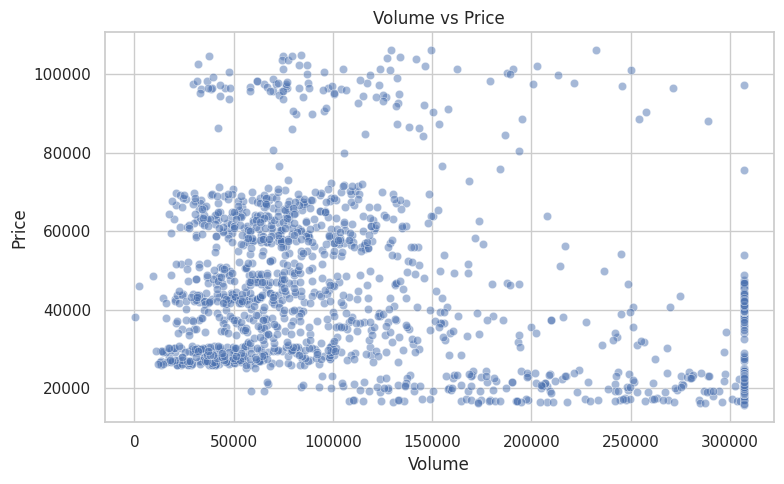

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='Vol.', y='Price', alpha=0.5)
plt.title('Volume vs Price')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

There is no strong relationship between trading volume and Bitcoin price.
Price remains highly variable even with high volume levels.

### 3️⃣ Price Change % Distribution – Understand target behavior

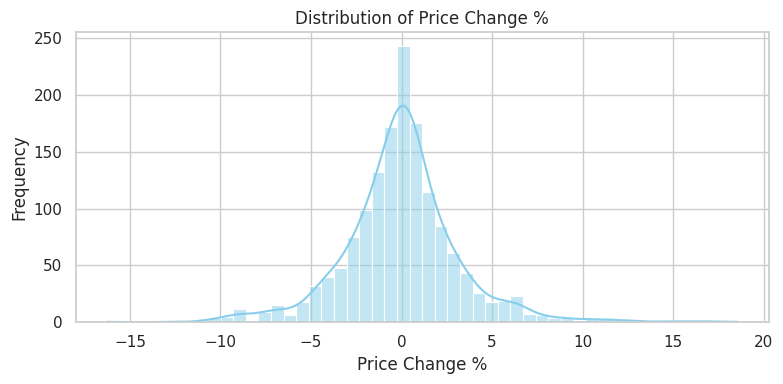

In [29]:
plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['Price_Change_Percent'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Price Change %')
plt.xlabel('Price Change %')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most daily price changes are centered around 0%, forming a near-normal distribution.
However, there are outliers indicating occasional high volatility.


### 4️⃣ Correlation Heatmap – Find top features linked with target

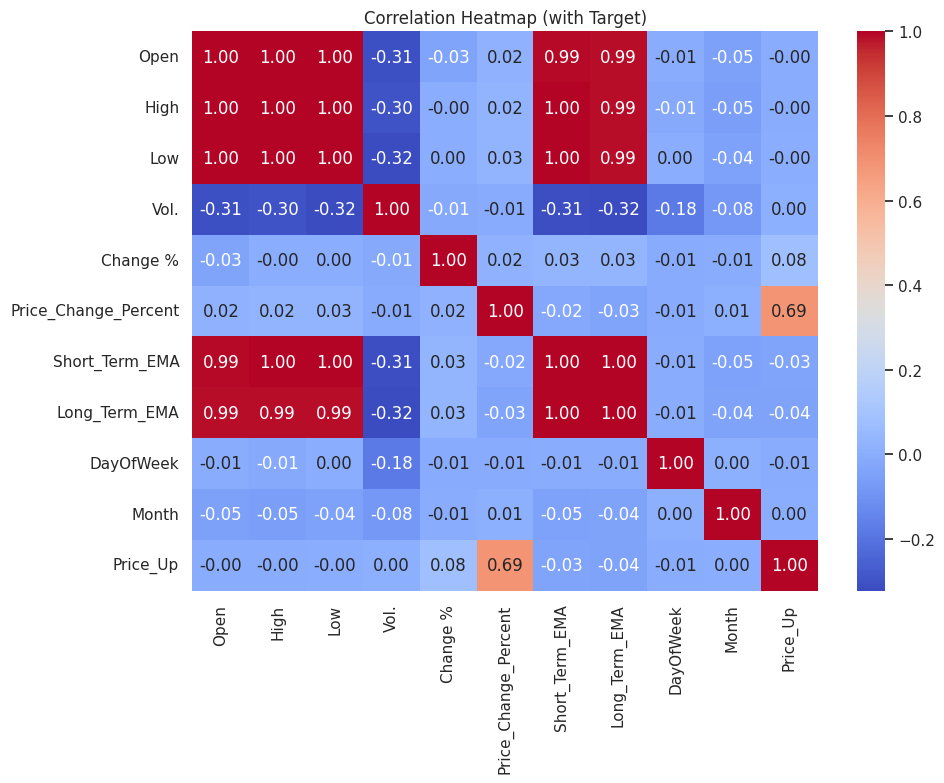

In [30]:
df_cleaned['Price_Up'] = np.where(df_cleaned['Price_Change_Percent'] > 0, 1, 0)
selected_for_corr = [
    'Open', 'High', 'Low', 'Vol.', 'Change %',
    'Price_Change_Percent', 'Short_Term_EMA', 'Long_Term_EMA',
    'DayOfWeek', 'Month', 'Price_Up'
]
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[selected_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (with Target)')
plt.tight_layout()
plt.show()

Price_Change_Percent has the strongest positive correlation with the target variable Price_Up.
Volume and temporal features like DayOfWeek and Month show weak correlations.






### 5️⃣ EMAs vs Price – See if EMAs capture trend direction


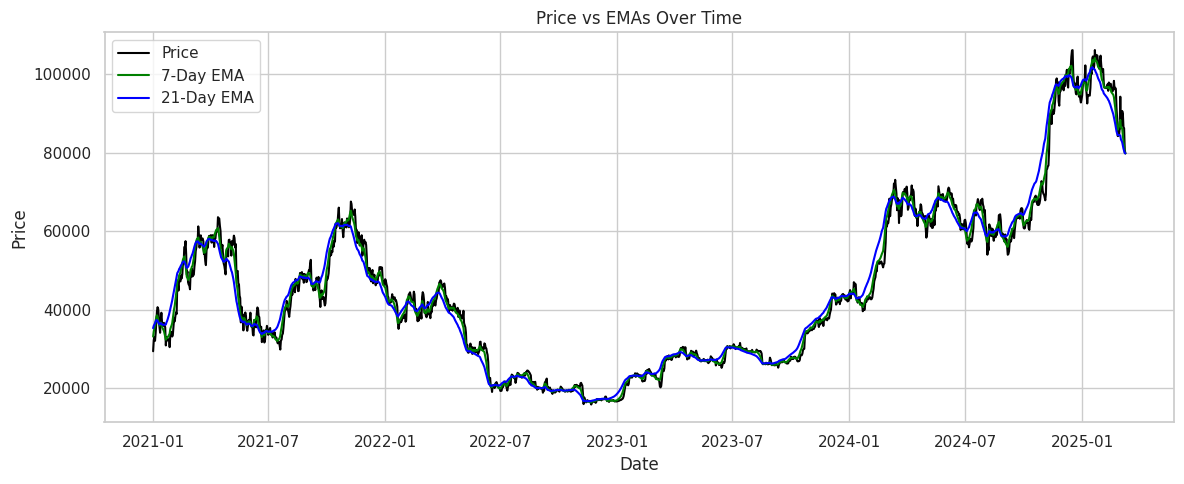

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(df_cleaned['Date'], df_cleaned['Price'], label='Price', color='black')
plt.plot(df_cleaned['Date'], df_cleaned['Short_Term_EMA'], label='7-Day EMA', color='green')
plt.plot(df_cleaned['Date'], df_cleaned['Long_Term_EMA'], label='21-Day EMA', color='blue')
plt.title('Price vs EMAs Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

Bitcoin price tracks closely with short and long-term EMAs.
EMA crossovers can act as indicators of trend reversals or momentum shifts.

# **✅Model Building**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
# Features and target for regression
X = df_features.drop(columns=['Price_Change_Percent', 'Price_Up'])
y = df_features['Price_Change_Percent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [35]:
# Predictions
y_pred = lr_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")


📊 Linear Regression Performance:
Mean Squared Error (MSE): 5.8701
Root Mean Squared Error (RMSE): 2.4228
R-squared Score (R²): 0.4160


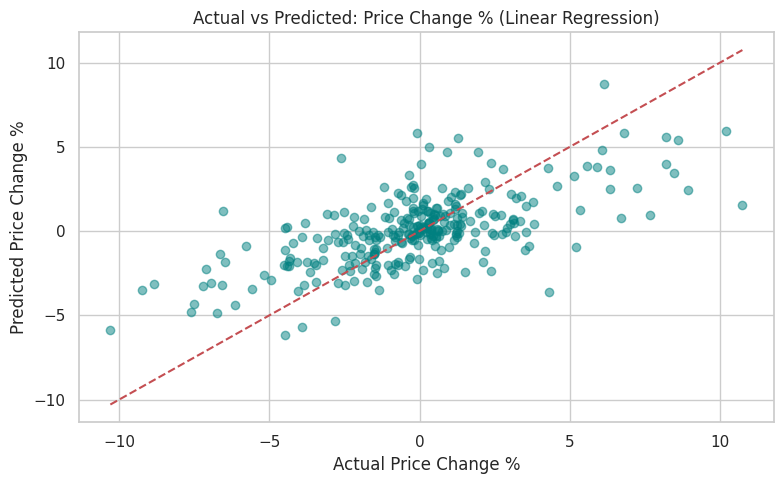

In [36]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price Change %')
plt.ylabel('Predicted Price Change %')
plt.title('Actual vs Predicted: Price Change % (Linear Regression)')
plt.tight_layout()
plt.show()